In [0]:
import pandas as pd
import numpy as np

In [0]:
gs_data= pd.read_csv("gs_data.csv")

In [0]:
#from sklearn.preprocessing import StandardScaler
gs_data.drop(gs_data.columns[26:], axis=1,inplace =True)
features= gs_data.head(0)
#gs_data.head()

In [0]:
#gs_data1= gs_data.drop(["postalCode","menuPageURL",'latitude','longitude', "menus.currency","id","address","country","dateUpdated", "keys","menus.amountMax","menus.amountMin","menus.category", "priceRangeCurrency", "priceRangeMin","priceRangeMax"], axis=1)
#gs_data1= gs_data1.drop_duplicates()
#gs_data1.head()

KeyError: ignored

In [0]:
#df=gs_data.drop(['keys','id','country', 'priceRangeCurrency','menus.currency'],axis=1)
df=df.sort_values(by= 'latitude', na_position= 'first').reset_index(drop=True)


In [0]:
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
locator = Nominatim(user_agent= 'myGeocoder',timeout = 5)
geocode = RateLimiter(locator.geocode, min_delay_seconds=2)
for index,rows in df.iterrows():
  if np.isnan(df['latitude'][index]):
    location= locator.geocode(df['address'][index])
    if location:
      df.at[index,'latitude']= location.latitude
      df.at[index, 'longitude']= location.longitude
    print (index)
  else: break

df.head()

GeocoderQuotaExceeded: ignored

In [0]:
#df.head()

,address,categories,city,cuisines,dateAdded,dateUpdated,latitude,longitude,menuPageURL,menus.amountMax,menus.amountMin,menus.category,menus.dateSeen,menus.description,menus.name,name,postalCode,priceRangeMin,priceRangeMax,province,websites
0,10550 W I 25 Frontage Rd,Fast Food Restaurant,Longmont,NaN,2016-09-09T17:30:34Z,2016-10-04T05:15:17Z,NaN,NaN,NaN,NaN,NaN,NaN,2016-09-09T17:30:34Z,NaN,Sausage Burrito,Mcdonald's,80504,NaN,NaN,Niwot,http://mcdonalds.com
1,414 Old Newport Blvd,American Restaurant,Newport Beach,NaN,2015-10-23T01:30:35Z,2017-07-06T19:18:19Z,NaN,NaN,NaN,5.25,5.25,NaN,2016-03-30T04:16:46Z,NaN,Shrimp Taco,The Chicken Coop,92663,NaN,NaN,CA,NaN
2,414 Old Newport Blvd,American Restaurant,Newport Beach,NaN,2015-10-23T01:30:35Z,2017-07-06T19:18:19Z,NaN,NaN,NaN,5.25,5.25,NaN,2016-03-30T04:16:46Z,NaN,Fish Taco,The Chicken Coop,92663,NaN,NaN,CA,NaN
3,414 Old Newport Blvd,American Restaurant,Newport Beach,NaN,2015-10-23T01:30:35Z,2017-07-06T19:18:19Z,NaN,NaN,NaN,5.25,5.25,NaN,2016-03-30T04:16:46Z,NaN,Fajitas Steak Taco,The Chicken Coop,92663,NaN,NaN,CA,NaN
4,414 Old Newport Blvd,American Restaurant,Newport Beach,NaN,2015-10-23T01:30:35Z,2017-07-06T19:18:19Z,NaN,NaN,NaN,5.25,5.25,NaN,2016-03-30T04:16:46Z,NaN,Calamari Taco,The Chicken Coop,92663,NaN,NaN,CA,NaN


In [0]:
df.to_csv('gs_data1.csv')

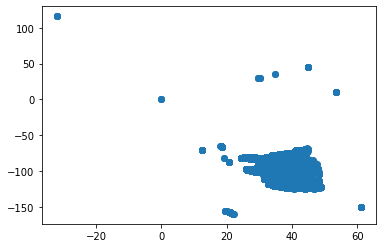

In [0]:
lat= df["latitude"]
lon= df["longitude"]
import matplotlib.pyplot as plt
plt.scatter(lat, lon)
#plt.colorbar()
plt.show()

In [0]:
gs_data2=gs_data1[["city","menus.dateSeen","menus.name"]]

In [0]:
for index, row in gs_data2.iterrows():
  gs_data2.at[index,'Date'] = gs_data2["menus.dateSeen"][index][:7]  
  if "Taco" in gs_data2["menus.name"][index]:
    gs_data2.at[index, 'T/B'] = "Taco"
  elif "Burrito" in gs_data2["menus.name"][index]:
    gs_data2.at[index,'T/B'] = "Burrito"
     


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [0]:
gs_data2=gs_data2.drop(["menus.dateSeen"],axis=1)
#gs_data2.head()

In [0]:
month=[0 for x in range(12)]
year=[0 for x in range(3)]
for index,row in gs_data2.iterrows():
  year[int(gs_data2["Date"][index][:4])-2015] +=1
  month[int(gs_data2["Date"][index][5:7])-1]+=1

In [0]:
#print (month, year)

In [0]:
tmonth=[0 for x in range(12)]
bmonth=[0 for x in range(12)]
for index,row in gs_data2.iterrows():
  if gs_data2["T/B"][index]=="Taco":
    tmonth[int(gs_data2["Date"][index][5:7])-1]+=1
  else:
    bmonth[int(gs_data2["Date"][index][5:7])-1]+=1

In [0]:
#print (tmonth, bmonth)

In [0]:
taco_details=[[0 for x in range(12)] for y in range(3)]
burrito_details=[[0 for x in range(12)] for y in range(3)]
for index,row in gs_data2.iterrows():
  if gs_data2["T/B"][index]=="Taco":
    taco_details[int(gs_data2["Date"][index][:4])-2015][int(gs_data2["Date"][index][5:7])-1]+=1
  else:
    burrito_details[int(gs_data2["Date"][index][:4])-2015][int(gs_data2["Date"][index][5:7])-1]+=1
 

In [0]:
#print (taco_details)
#print (burrito_details)

In [0]:
tmaximum_sales=max(taco_details[1])
tmax_sales_month=taco_details[1].index(tmaximum_sales)
bmaximum_sales=max(burrito_details[1])
bmax_sales_month=burrito_details[1].index(bmaximum_sales)
#print (tmaximum_sales,bmaximum_sales)

In [0]:
t_ingredients=[]
b_ingredients=[]
for index,row in gs_data2.iterrows():
  if int(gs_data2["Date"][index][5:7])==tmax_sales_month and gs_data2["T/B"][index]=="Taco":
    ing=gs_data1["menus.description"][index]
    if not pd.isna(ing):
      t_ingredients.append(ing)
  elif int(gs_data2["Date"][index][5:7])==bmax_sales_month and gs_data2["T/B"][index]=="Burrito":
    ing=gs_data1["menus.description"][index]
    if not pd.isna(ing):
      b_ingredients.append(ing)
#print (t_ingredients)
#print(b_ingredients)

In [0]:
import collections
counter=collections.Counter(t_ingredients)
counter2=collections.Counter(b_ingredients)
#print (counter)
#print(counter2)

In [0]:
popular_taco_toppings={'cheese':0,'salsa':0,'lettuce':0,'sour cream':0,'tomato':0,'sauce':0,'cilantro':0,'onion':0,'rice':0,'corn':0,'chicken':0,'beef':0,'bean':0}
popular_burrito_toppings={'salsa':0,'cheese':0,'onion':0,'beef':0,'chicken':0,'sauce':0,'rice':0,'bean':0,'guac':0,'cream':0,'steak':0}
for i in range(len(t_ingredients)):
  for key in popular_taco_toppings:
    if key in t_ingredients[i]:
      popular_taco_toppings[key]+=1
for i in range(len(b_ingredients)):
  for key in popular_burrito_toppings:
    if key in b_ingredients[i]:
      popular_burrito_toppings[key]+=1
sorted_d = sorted(popular_taco_toppings.items(), key=lambda x: x[1],reverse=True)
sorted_d2 = sorted(popular_burrito_toppings.items(), key=lambda x: x[1],reverse=True)
ing_list=[]
for item in sorted_d:
  if any(item[0] in key for key in sorted_d2):    
    ing_list.append(item[0])
df2= pd.DataFrame(columns=['ingredients', 'burito_count','taco_count'])
for ele in ing_list:
  df2=df2.append({'ingredients':ele, 'burito_count':popular_burrito_toppings.get(ele),'taco_count':popular_taco_toppings.get(ele)},ignore_index=True)
#df.to_csv('ingredients.csv')

In [0]:
df.head(10)

,address,categories,city,cuisines,dateAdded,dateUpdated,latitude,longitude,menuPageURL,menus.amountMax,menus.amountMin,menus.category,menus.dateSeen,menus.description,menus.name,name,postalCode,priceRangeMin,priceRangeMax,province,websites
0,10550 W I 25 Frontage Rd,Fast Food Restaurant,Longmont,NaN,2016-09-09T17:30:34Z,2016-10-04T05:15:17Z,NaN,NaN,NaN,NaN,NaN,NaN,2016-09-09T17:30:34Z,NaN,Sausage Burrito,Mcdonald's,80504,NaN,NaN,Niwot,http://mcdonalds.com
1,414 Old Newport Blvd,American Restaurant,Newport Beach,NaN,2015-10-23T01:30:35Z,2017-07-06T19:18:19Z,NaN,NaN,NaN,5.25,5.25,NaN,2016-03-30T04:16:46Z,NaN,Shrimp Taco,The Chicken Coop,92663,NaN,NaN,CA,NaN
2,414 Old Newport Blvd,American Restaurant,Newport Beach,NaN,2015-10-23T01:30:35Z,2017-07-06T19:18:19Z,NaN,NaN,NaN,5.25,5.25,NaN,2016-03-30T04:16:46Z,NaN,Fish Taco,The Chicken Coop,92663,NaN,NaN,CA,NaN
3,414 Old Newport Blvd,American Restaurant,Newport Beach,NaN,2015-10-23T01:30:35Z,2017-07-06T19:18:19Z,NaN,NaN,NaN,5.25,5.25,NaN,2016-03-30T04:16:46Z,NaN,Fajitas Steak Taco,The Chicken Coop,92663,NaN,NaN,CA,NaN
4,414 Old Newport Blvd,American Restaurant,Newport Beach,NaN,2015-10-23T01:30:35Z,2017-07-06T19:18:19Z,NaN,NaN,NaN,5.25,5.25,NaN,2016-03-30T04:16:46Z,NaN,Calamari Taco,The Chicken Coop,92663,NaN,NaN,CA,NaN
5,3616 E Chapman Ave,Sushi Restaurant,Orange,NaN,2016-03-30T04:27:02Z,2017-07-06T13:15:10Z,NaN,NaN,NaN,3.00,3.00,NaN,"2016-10-26T22:40:40Z,2016-03-30T04:27:02Z",NaN,"Octopus, Taco",Maki Yaki,92869,NaN,NaN,CA,NaN
6,3761 Laclede Ave,Mexican Restaurant,Saint Louis,NaN,2016-03-26T04:06:18Z,2017-06-25T11:28:10Z,NaN,NaN,NaN,8.00,8.00,NaN,"2016-04-20T10:52:52Z,2016-03-26T04:06:18Z",NaN,La Isla Burrito,Diablitos,63108,NaN,NaN,MO,NaN
7,3761 Laclede Ave,Mexican Restaurant,Saint Louis,NaN,2016-03-26T04:06:18Z,2017-06-25T11:28:10Z,NaN,NaN,NaN,7.00,7.00,NaN,"2016-04-20T10:52:52Z,2016-03-26T04:06:18Z",NaN,Lil Taco,Diablitos,63108,NaN,NaN,MO,NaN
8,3761 Laclede Ave,Mexican Restaurant,Saint Louis,NaN,2016-03-26T04:06:18Z,2017-06-25T11:28:10Z,NaN,NaN,NaN,NaN,NaN,NaN,"2016-04-20T10:52:52Z,2016-03-26T04:06:18Z",NaN,El Taco Gringo,Diablitos,63108,NaN,NaN,MO,NaN
9,600 N First St,"American Restaurant,Wings Joint,Sports Bar",Burbank,NaN,2016-03-24T10:16:27Z,2016-09-08T06:11:05Z,NaN,NaN,NaN,7.99,7.99,NaN,"2016-03-24T10:16:27Z,2016-09-08T06:11:05Z",Blackened white fish topped with pico de gallo...,Baja Fish Taco,Hooters of Burbank,91502,25.0,40.0,CA,http://www.westcoasthooters.com


In [0]:
#fillna after splitting data into test and training.
df.isnull().sum()

address                  0
categories               0
city                     0
cuisines             38876
dateAdded                0
dateUpdated              0
latitude             21624
longitude            21624
menuPageURL          67206
menus.amountMax      37000
menus.amountMin      37000
menus.category       73531
menus.dateSeen           0
menus.description    47937
menus.name               0
name                     3
postalCode             423
priceRangeMin        29101
priceRangeMax        29101
province                 3
websites             21271
dtype: int64

In [0]:
df.to_csv('gs_data1.csv')

In [0]:
#df_temp=df.drop('address',axis=1)
df.mean()

latitude           36.694846
longitude         -98.713309
menus.amountMax     8.754767
menus.amountMin     8.611666
priceRangeMin      13.734837
priceRangeMax      33.722627
dtype: float64

In [0]:
df['menus.amountMax','menus.amountMin'].fillna(df.mean()['menus.amountMax','menus.amountMin'])
df.head()

KeyError: ignored

In [0]:
df.head(10)

,address,categories,city,cuisines,dateAdded,dateUpdated,latitude,longitude,menuPageURL,menus.amountMax,menus.amountMin,menus.category,menus.dateSeen,menus.description,menus.name,name,postalCode,priceRangeMin,priceRangeMax,province,websites
0,10550 W I 25 Frontage Rd,Fast Food Restaurant,Longmont,NaN,2016-09-09T17:30:34Z,2016-10-04T05:15:17Z,40.288002,-104.980523,NaN,NaN,NaN,NaN,2016-09-09T17:30:34Z,NaN,Sausage Burrito,Mcdonald's,80504,NaN,NaN,Niwot,http://mcdonalds.com
1,414 Old Newport Blvd,American Restaurant,Newport Beach,NaN,2015-10-23T01:30:35Z,2017-07-06T19:18:19Z,33.625899,-117.926530,NaN,5.25,5.25,NaN,2016-03-30T04:16:46Z,NaN,Shrimp Taco,The Chicken Coop,92663,NaN,NaN,CA,NaN
2,414 Old Newport Blvd,American Restaurant,Newport Beach,NaN,2015-10-23T01:30:35Z,2017-07-06T19:18:19Z,33.625899,-117.926530,NaN,5.25,5.25,NaN,2016-03-30T04:16:46Z,NaN,Fish Taco,The Chicken Coop,92663,NaN,NaN,CA,NaN
3,414 Old Newport Blvd,American Restaurant,Newport Beach,NaN,2015-10-23T01:30:35Z,2017-07-06T19:18:19Z,33.625899,-117.926530,NaN,5.25,5.25,NaN,2016-03-30T04:16:46Z,NaN,Fajitas Steak Taco,The Chicken Coop,92663,NaN,NaN,CA,NaN
4,414 Old Newport Blvd,American Restaurant,Newport Beach,NaN,2015-10-23T01:30:35Z,2017-07-06T19:18:19Z,33.625899,-117.926530,NaN,5.25,5.25,NaN,2016-03-30T04:16:46Z,NaN,Calamari Taco,The Chicken Coop,92663,NaN,NaN,CA,NaN
5,3616 E Chapman Ave,Sushi Restaurant,Orange,NaN,2016-03-30T04:27:02Z,2017-07-06T13:15:10Z,36.708791,-119.717982,NaN,3.00,3.00,NaN,"2016-10-26T22:40:40Z,2016-03-30T04:27:02Z",NaN,"Octopus, Taco",Maki Yaki,92869,NaN,NaN,CA,NaN
6,3761 Laclede Ave,Mexican Restaurant,Saint Louis,NaN,2016-03-26T04:06:18Z,2017-06-25T11:28:10Z,38.635477,-90.238386,NaN,8.00,8.00,NaN,"2016-04-20T10:52:52Z,2016-03-26T04:06:18Z",NaN,La Isla Burrito,Diablitos,63108,NaN,NaN,MO,NaN
7,3761 Laclede Ave,Mexican Restaurant,Saint Louis,NaN,2016-03-26T04:06:18Z,2017-06-25T11:28:10Z,38.635477,-90.238386,NaN,7.00,7.00,NaN,"2016-04-20T10:52:52Z,2016-03-26T04:06:18Z",NaN,Lil Taco,Diablitos,63108,NaN,NaN,MO,NaN
8,3761 Laclede Ave,Mexican Restaurant,Saint Louis,NaN,2016-03-26T04:06:18Z,2017-06-25T11:28:10Z,38.635477,-90.238386,NaN,NaN,NaN,NaN,"2016-04-20T10:52:52Z,2016-03-26T04:06:18Z",NaN,El Taco Gringo,Diablitos,63108,NaN,NaN,MO,NaN
9,600 N First St,"American Restaurant,Wings Joint,Sports Bar",Burbank,NaN,2016-03-24T10:16:27Z,2016-09-08T06:11:05Z,32.499313,-94.734945,NaN,7.99,7.99,NaN,"2016-03-24T10:16:27Z,2016-09-08T06:11:05Z",Blackened white fish topped with pico de gallo...,Baja Fish Taco,Hooters of Burbank,91502,25.0,40.0,CA,http://www.westcoasthooters.com
